In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 5
name = 'lgbm'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [5]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))
filename

'./records/cicso0/ims/temp/model/200037/5/lgbm_predict_data.feather'

In [6]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,-0.000025
1,2024-12-05 10:21:00,IM,-0.000716,-0.000026
2,2024-12-05 10:22:00,IM,-0.001164,-0.000041
3,2024-12-05 10:23:00,IM,-0.000192,-0.000011
4,2024-12-05 10:24:00,IM,-0.000006,-0.000013


In [7]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,-0.000025
5,2024-12-05 10:25:00,IM,-0.000206,-0.000011
10,2024-12-05 10:30:00,IM,0.003050,-0.000017
15,2024-12-05 10:35:00,IM,0.004669,-0.000008
20,2024-12-05 10:40:00,IM,0.000327,-0.000025


In [8]:
from lib.cux001 import FactorEvaluate1

In [9]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [10]:
stats_dt = evaluate1.run()

In [11]:
stats_dt

{'total_ret': 0.095676485869995,
 'avg_ret': 3.314611546107598e-05,
 'max_dd': -0.017510064553191818,
 'calmar': 5.464085273892073,
 'sharpe1': 0.05008886374351295,
 'sharpe2': 4.454866617697928,
 'turnover': 0.3976284023346744,
 'win_rate': 0.4779436152570481,
 'profit_ratio': 1.1787327576765807,
 'ic_mean': 0.05433903917575818,
 'ic_std': 0.07166696971561676,
 'ic_ir': 0.7582159451052847,
 'factor_autocorr': -0.08258364169339653,
 'ret_autocorr': -0.037199780961824996}

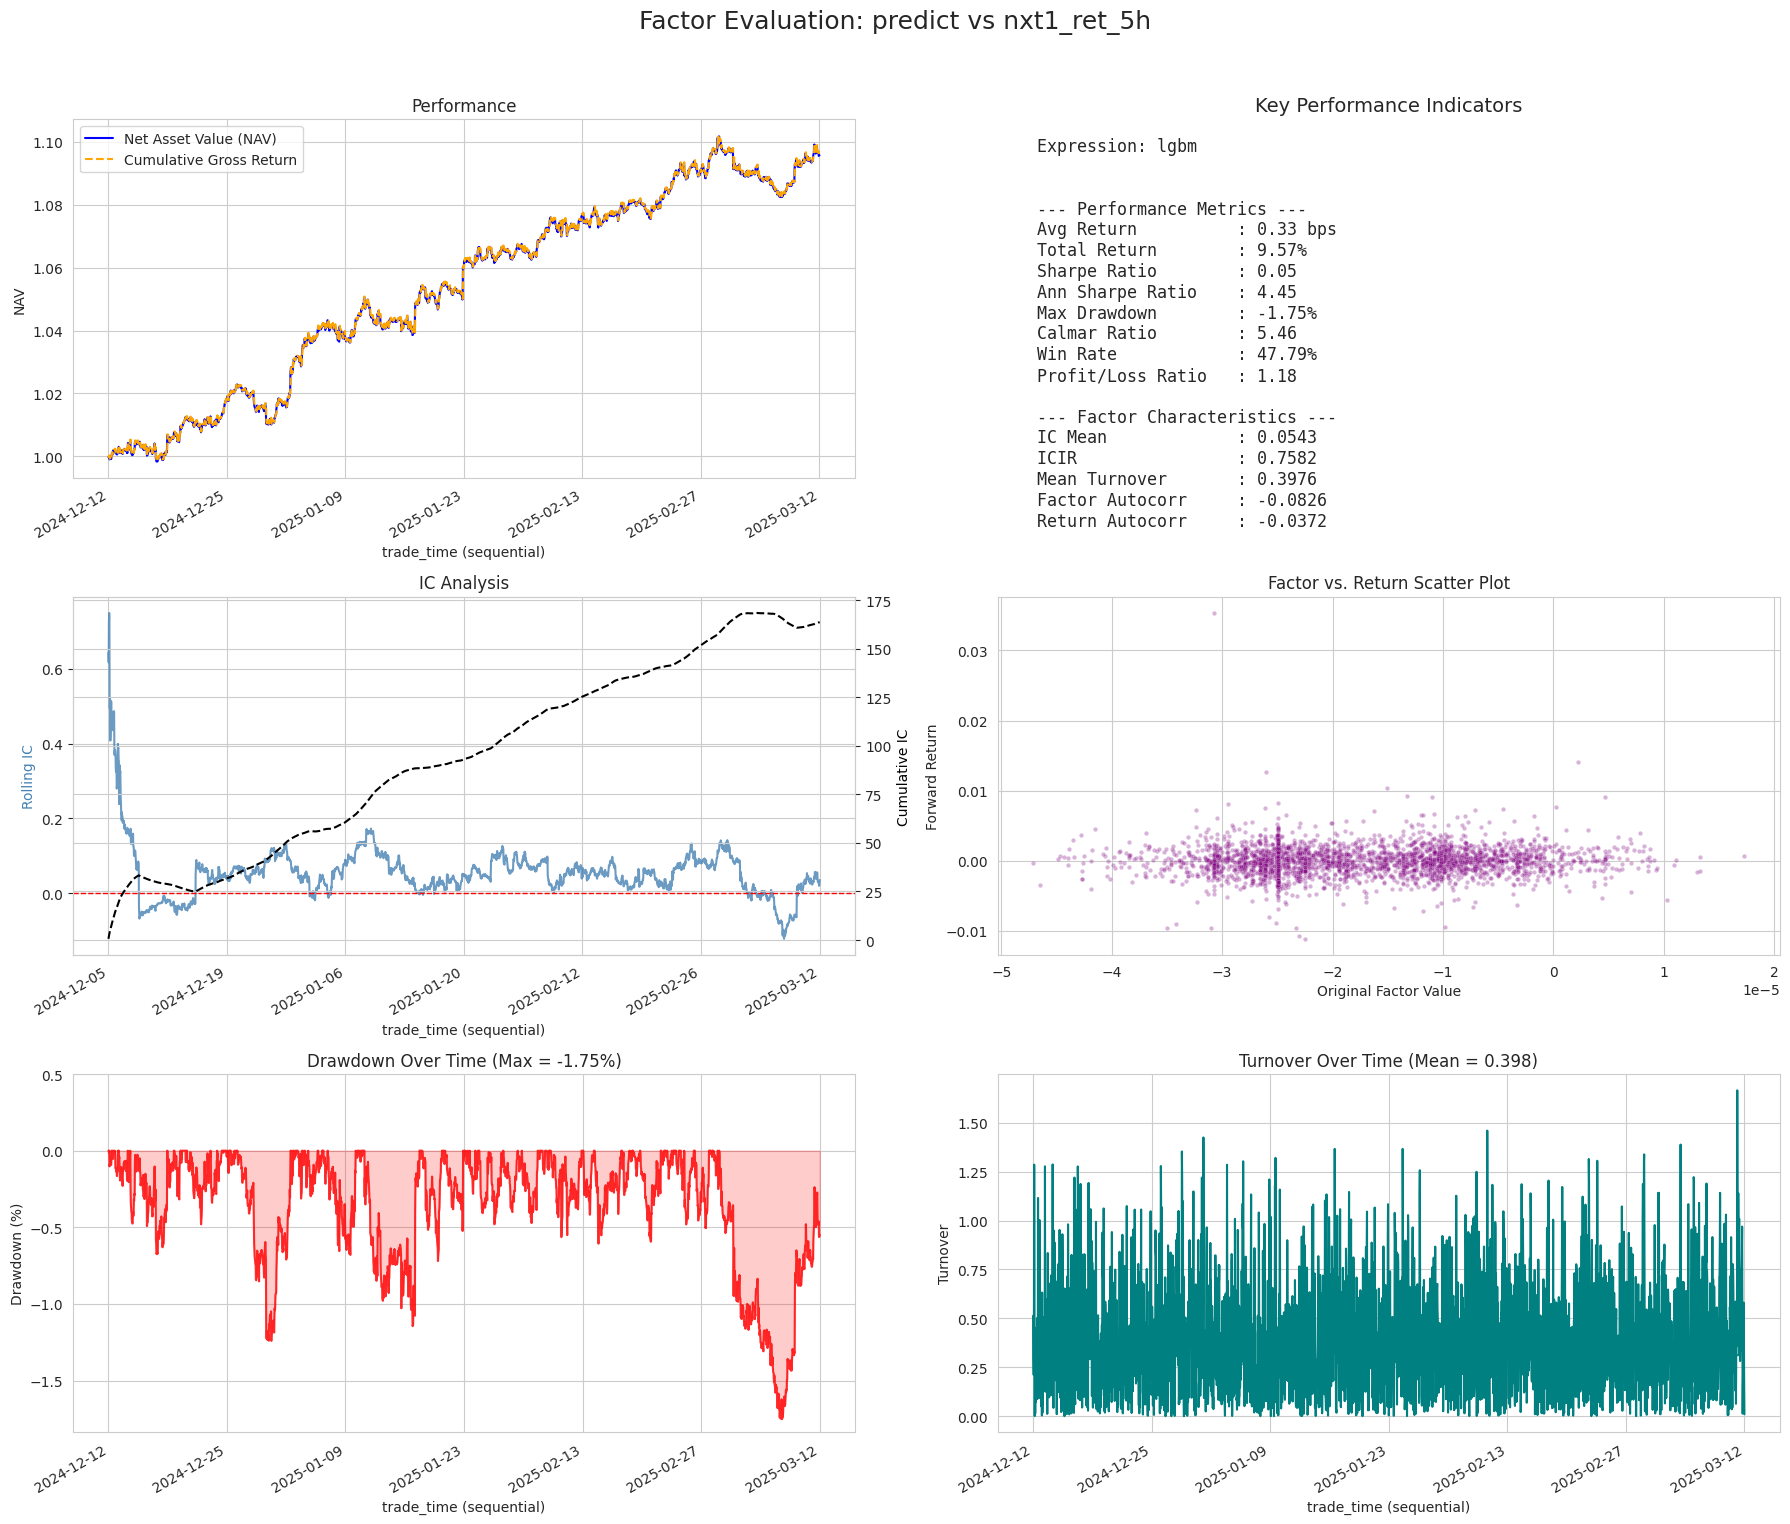

In [12]:
evaluate1.plot_results()